Heirarchial Clustering:  Features and Ideas and Discussions 

In [1]:
options(warn=-1) #ignore warnings up ahead 
# Need to increase the data rate limit 
# Run this Command 
# jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e10

In [4]:
#Imports 
library(tm)
library(readr)
library(SnowballC)
library(fastcluster)
library(dplyr)
library(cluster)   
library(tokenizers)

In [5]:
# First Few Rows 
data <- read.csv("csm_1.csv")
head(data[1, ])

X all_subforums                 subsectionpage all_thread_ids
1 1 Features and Ideas Discussion 1              1108181       
  titlee                          threadpage datee               username     
1 features and ideas rules thread 1          2009.06.28 15:48:00 CCP Zymurgist
  post2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     
1 the features and ideas forum is primarily for players to make suggestions or put forth ideas that they feel may improve eve. if you know of an issue or problem it belongs in either:known issues & workaroundsortest server feedbackalong with this, the rules are going to be enforced at a more vigorous level. please, read the forum rules, and pay attention to them. if you don't like someone's idea, please remember to post with respect towards fellow players at all times and remain constructive.thus a couple ground rules:1) this is a breeding ground for ideas. if someone has an idea, listen to it. if you don't like it, think about why. constructive feedback is good. posting "that's an awful idea," is not constructive.2) this is not a forum for known issues. there are links above to the forums that deal with those. if you have an idea of how to improve an issue, that is one thing. if you are simply pointing out flaws and shortcomings, it is not a feature or idea.3) please put some information regarding your idea in the topic. topics named things like "an idea" or "does anybody think...." will be renamed.4) this is for features and ideas - not simple requests. threads like "i want xxx module. give it to me now," are not constructive. please put some ideas into it, even if it's just a suggestion or two to spark a thread.5) before posting an idea, please check the commonly proposed ideas thread to see if there's already a topic running for it. reposts will be locked and routed to the active thread.

We needed to concatenate the rows based on on the thread ids. I aggreggated each post by the thread_ids. 

In [6]:
data2 <- aggregate(post2 ~ all_thread_ids, data = data[1:2000,], paste)
data2[1, ]

all_thread_ids
1 1108165       
  post2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

Clean up the data for analysis 

In [6]:
review_corpus <- Corpus(VectorSource(data2$post2))
review_corpus = tm_map(review_corpus, content_transformer(tolower))
review_corpus = tm_map(review_corpus, removeNumbers)
review_corpus = tm_map(review_corpus, removePunctuation)
review_corpus = tm_map(review_corpus, removeWords, c("the", "and", "dont", "eve", "give", "going", "get", "just","can", "good","new","make", "ideas", "one", "like", stopwords("english")))

review_corpus =  tm_map(review_corpus, stripWhitespace)

In [7]:
# Document Term Matrix 
review_dtm <- DocumentTermMatrix(review_corpus)
inspect(review_dtm)

<<DocumentTermMatrix (documents: 12, terms: 18076)>>
Non-/sparse entries: 39495/177417
Sparsity           : 82%
Maximal term length: 133
Weighting          : term frequency (tf)
Sample             :
    Terms
Docs mining need nullsec people sec ship ships small time will
  10      8   66      11     93  16   89   124   231   57  111
  11      0   47       1     31   9   96   156    47   39   69
  12     14   34      26     42  44   51    31    98   39   68
  3       3   88       1     28   7  174   151    51   62   95
  4     813  177     259    238 475  139   171   101  208  412
  5      63   72     158     65 150   31    61    40   62  191
  6      14   67      34     38  53   66   103    29   52  105
  7       3   37      10     38  14   70    53    18   50   39
  8      12   42     131    106  95   67    47    21   52  117
  9       7   21      32     28  67    4    14    24   33   54


In [194]:
write.csv(findMostFreqTerms(review_dtm, 50), file = "terms/overall.csv")

In [154]:
# Frequent Terms 
findMostFreqTerms(review_dtm, 20)

$`1`
  ship   idea   corp   game  ships thread   will    ccp  drone   even   post 
    25     23     21     15     14     14     14     13     13     13     13 
   see   time  local please  space    way   need  skill  think 
    13     13     12     12     12     12     11     10     10 

$`2`
        idea       please constructive        forum          put        rules 
           8            5            3            3            3            3 
      thread     features       ground      improve        issue       issues 
           3            2            2            2            2            2 
     players      posting        think        topic         will       active 
           2            2            2            2            2            1 
     already      anybody 
           1            1 

$`3`
     ship     speed     ships     bonus   dramiel   oneiros      will      need 
      174       158       151       147       121       120        95        88 
   edited  guardian      tank       fit       cap     range logistics     armor 
       86        86        83        80        79        78        77        74 
     also    really       dps     drone 
       73        70        66        66 

$`4`
  mining      ice      sec     will     high     null  nullsec   people 
     813      522      475      412      344      330      259      238 
minerals      ore     mine     time   miners     need    ships    space 
     236      234      228      208      177      177      171      170 
     low     want     even     game 
     167      158      155      152 

$`5`
      will    nullsec        sec   industry production       null       want 
       191        158        150        147        107         96         90 
      high      slots        pos       need       even    players    highsec 
        81         74         73         72         70         70         67 
    people     mining       time   alliance      ships  alliances 
        65         63         62         61         61         58 

$`6`
     jump      will     ships logistics    system      need      ship     fleet 
      154       105       103        87        82        67        66        59 
   fleets     space       sec      time       way    bridge      null     think 
       57        55        53        52        51        48        48        47 
alliances     large      also      fuel 
       46        45        44        44 

$`7`
exploration       sites      system        ship        site       space 
        106          99          84          70          68          68 
      ships        time        find       maybe   something         way 
         53          50          44          42          42          42 
     combat        will        idea      people       think        need 
         39          39          38          38          38          37 
     really     content 
         37          34 

$`8`
     pve  nullsec     will   people missions  mission      sec      isk 
     148      131      117      106      105      104       95       76 
 players     ship   agents     null   player     want      pvp  faction 
      70       67       65       64       64       63       61       58 
    even    level     game    space 
      57       56       55       53 

$`9`
      npc     space standings       sec  stations      will      null  standing 
      167       107        78        67        61        54        51        49 
   system   faction  missions      rats   players    region   station    pirate 
       47        45        42        39        38        37        36        35 
  systems      time   nullsec    player 
       33        33        32        31 

$`10`
    small     ships      will     fleet     local    people      ship      gang 
      231       124       111        95        95        93        89        85 
   system       pvp      also      need       way    edited      idea    combat 
 

In [12]:
#TF-IDF(Term Frequency Inverse Document Frequency) 
#Measures the relative importance of a word to a DocumentTermMatrix
review_dtm_tfidf <- DocumentTermMatrix(review_corpus, control = list(weighting = weightTfIdf))
review_dtm_tfidf = removeSparseTerms(review_dtm_tfidf, 0.95)

In [13]:
review_dtm_tfidf

<<DocumentTermMatrix (documents: 12, terms: 18044)>>
Non-/sparse entries: 39110/177418
Sparsity           : 82%
Maximal term length: 133
Weighting          : term frequency - inverse document frequency (normalized) (tf-idf)

In [14]:
# Save TFIDF into a CSV 
res <- as.matrix(review_dtm_tfidf[, 1:10])
write.csv(res, file = "MyData.csv")

In [15]:
hc <- read.csv("MyData.csv", na.strings=c("NA","NaN", " ", "?") )#csv with tfidf of 10 docs
df <- na.omit(hc)
df <- scale(hc)#centroids 
head(df)  

X          abbreviation abilitiy   ability    able        absolutely
[1,] -1.5254255  3.1754265    3.1754265 -0.2843629 -0.30149683  2.8560243
[2,] -1.2480754 -0.2886751   -0.2886751 -1.2680660 -2.20106314 -0.7705994
[3,] -0.9707253 -0.2886751   -0.2886751 -0.1289346 -0.03068842 -0.2106471
[4,] -0.6933752 -0.2886751   -0.2886751 -0.6768915  0.08209571 -0.1167535
[5,] -0.4160251 -0.2886751   -0.2886751 -0.8640186 -0.26609237  0.4210836
[6,] -0.1386750 -0.2886751   -0.2886751  0.1765927  0.11652417 -0.7705994
     accessstation accordinglymy accounts   action     actionstransferable
[1,]  3.1754265     3.1754265     3.0493210  1.5758957  3.1754265         
[2,] -0.2886751    -0.2886751    -0.5456755 -1.2794844 -0.2886751         
[3,] -0.2886751    -0.2886751    -0.3606525 -1.2794844 -0.2886751         
[4,] -0.2886751    -0.2886751     0.3185163 -0.2498884 -0.2886751         
[5,] -0.2886751    -0.2886751     0.0449698 -0.3412266 -0.2886751         
[6,] -0.2886751    -0.2886751    -0.2749276  0.6559260 -0.2886751

Instead of cutting the clusters arbitrarily, we need to use some sort of cluster quality metrics. I ran into several problems with the library WeightedCluster(i.e. running out of memory on Rstudio server, installing Graphvix and running into more errors) so I chose to do a K means clustering to find groups. K means clustering is a type of unsupervised learning to find organic groups in data with the number of groups represented by the variable K 

In [16]:
library(cluster)

In [64]:
# K means 
df <- na.omit(hc)
df <- scale(hc)#centroids 

In [82]:
k.means.fit <- kmeans(hc, 3) #Group into 3 clusters 

In [83]:
# lists some attributes for us to use later
attributes(k.means.fit)

$names
[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

$class
[1] "kmeans"

In [84]:
# Centroids 
k.means.fit$centers

X    abbreviation abilitiy     ability      able         absolutely  
1  2.5 0.0003574953 0.0003574953 6.907383e-05 0.0002093329 1.557128e-04
2  6.5 0.0000000000 0.0000000000 8.987034e-05 0.0002947780 9.639634e-05
3 10.5 0.0000000000 0.0000000000 2.283361e-04 0.0003661822 4.536625e-05
  accessstation accordinglymy accounts     action       actionstransferable
1 0.0003574953  0.0003574953  2.260729e-04 5.631154e-05 0.0003574953       
2 0.0000000000  0.0000000000  5.391132e-05 1.083477e-04 0.0000000000       
3 0.0000000000  0.0000000000  3.876725e-05 5.788961e-05 0.0000000000

In [85]:
# Clusters 
k.means.fit$cluster

[1] 1 1 1 1 2 2 2 2 3 3 3 3

In [86]:
# Cluster Size 
k.means.fit$size

[1] 4 4 4

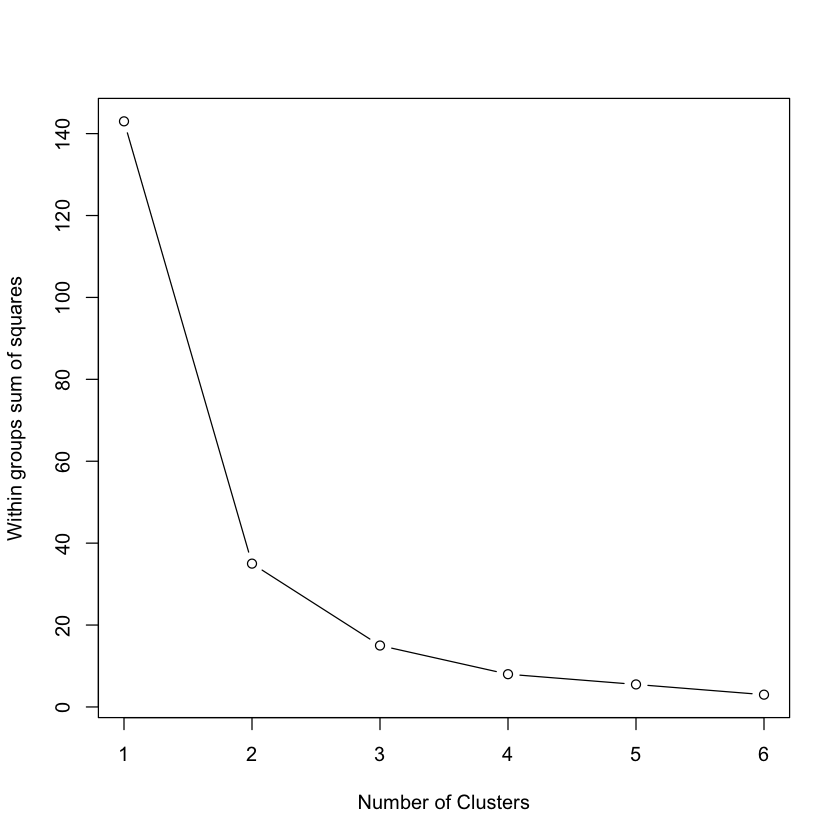

In [87]:
wssplot <- function(data, nc=15, seed=1234){
  wss <- (nrow(data)-1)*sum(apply(data,2,var))
  for (i in 2:nc){
    set.seed(seed)
    wss[i] <- sum(kmeans(data, centers=i)$withinss)}
  plot(1:nc, wss, type="b", xlab="Number of Clusters",
       ylab="Within groups sum of squares")}

wssplot(hc, nc=6) 

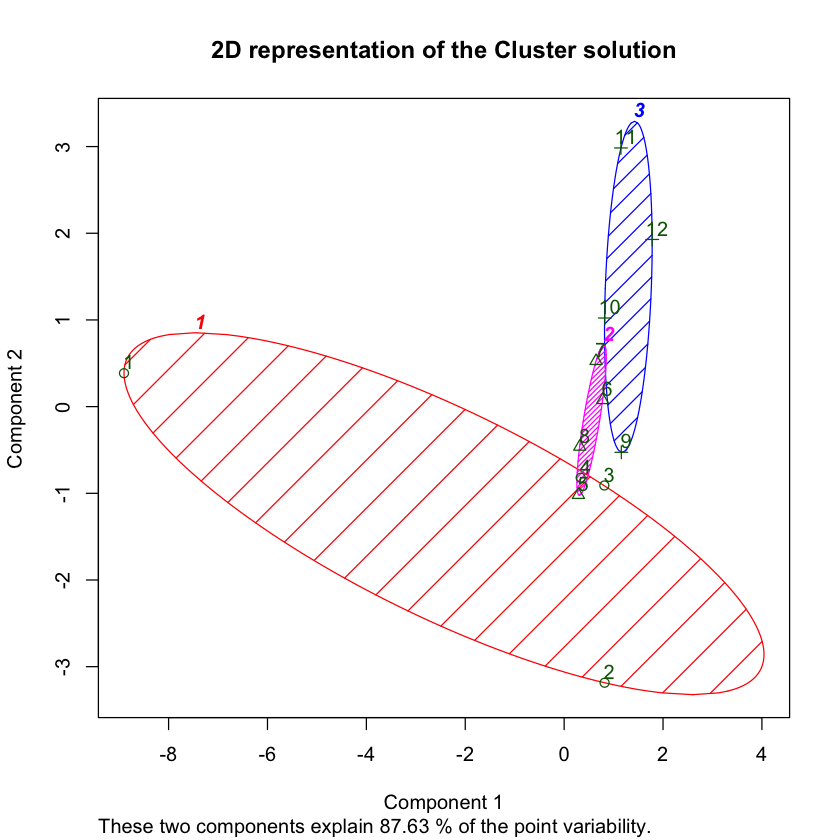

In [88]:
library(cluster)
clusplot(hc, k.means.fit$cluster, main='2D representation of the Cluster solution',
         color=TRUE, shade=TRUE,
         labels=2, lines=0)

In [89]:
d <- dist(hc, method = "euclidean") # Euclidean distance matrix.

In [90]:
H.fit <- hclust(d, method="ward.D")

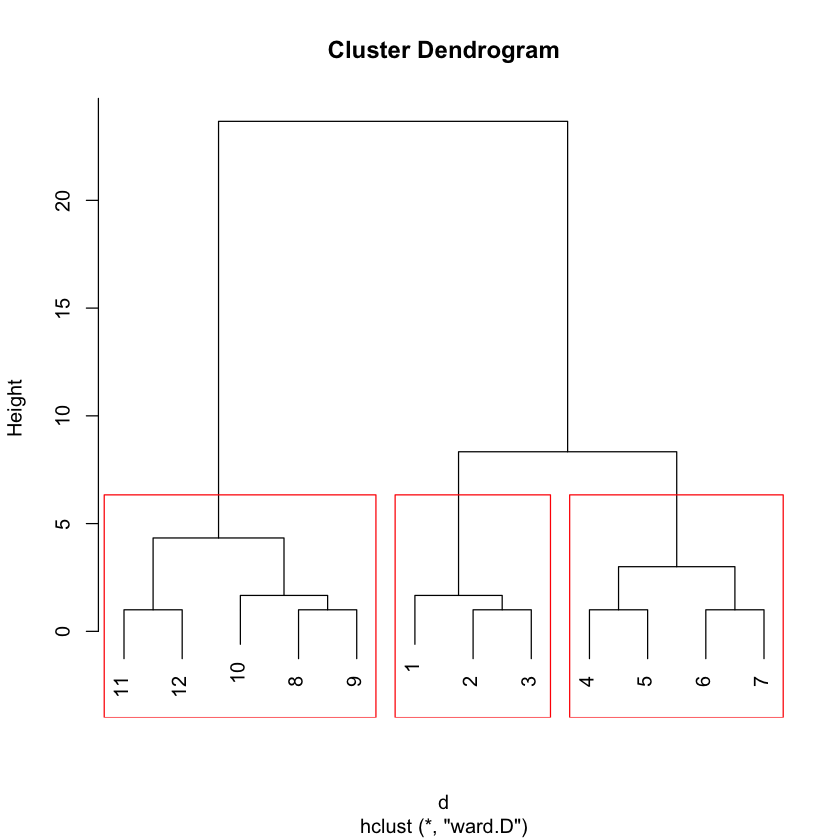

In [91]:
plot(H.fit) # display dendogram
groups <- cutree(H.fit, k=3) # cut tree into 2 clusters
# draw dendogram with red borders around the 2 clusters
rect.hclust(H.fit, k=3, border="red") 

Let's look at each cluster individually. Below is Cluster 1 

In [187]:
cluster_1 <- data2[c(8,9,10,11,12), 2]

In [188]:
cluster_1 <- Corpus(VectorSource(cluster_1))
cluster_1 = tm_map(cluster_1, content_transformer(tolower))
cluster_1 = tm_map(cluster_1, removeNumbers)
cluster_1 = tm_map(cluster_1, removePunctuation)
cluster_1 = tm_map(cluster_1, removeWords, c("the", "and", "dont", "eve", "give", "going", "get", "just","can", "good","new","make", "ideas", "one", "like", stopwords("english")))
cluster_1 =  tm_map(cluster_1, stripWhitespace)

In [189]:
cluster_1 <- DocumentTermMatrix(cluster_1)
inspect(cluster_1)

<<DocumentTermMatrix (documents: 5, terms: 9026)>>
Non-/sparse entries: 15755/29375
Sparsity           : 65%
Maximal term length: 63
Weighting          : term frequency (tf)
Sample             :
    Terms
Docs also fleet people sec ship ships small space system will
   1   52    17    106  95   67    47    21    53     36  117
   2   30    10     28  67    4    14    24   107     47   54
   3   68    95     93  16   89   124   231    51     79  111
   4   52   180     31   9   96   156    47     7     14   69
   5   27     2     42  44   51    31    98    76     54   68


In [191]:
write.csv(findMostFreqTerms(cluster_1, 50), file = "terms/cluster_1.csv")

In [180]:
findMostFreqTerms(cluster_1, 50)

$`1`
      pve   nullsec      will    people  missions   mission       sec       isk 
      148       131       117       106       105       104        95        76 
  players      ship    agents      null    player      want       pvp   faction 
       70        67        65        64        64        63        61        58 
     even     level      game     space      also      solo      time       way 
       57        56        55        53        52        52        52        51 
     loot    empire     ships      high      risk      need     think      best 
       48        47        47        45        43        42        42        41 
  highsec      much   rewards      corp     agent   content       npc something 
       40        40        40        39        38        37        36        36 
   system alliances       pay      play      idea       now       say  alliance 
       36        35        34        34        33        32        32        31 
      see      take 
       31        31 

$`2`
      npc     space standings       sec  stations      will      null  standing 
      167       107        78        67        61        54        51        49 
   system   faction  missions      rats   players    region   station    pirate 
       47        45        42        39        38        37        36        35 
  systems      time   nullsec    player      also     corps    people       way 
       33        33        32        31        30        28        28        28 
  mission       sov      want    empire  services     small   regions     allow 
       26        26        26        24        24        24        23        22 
     need    agents      high     owner     think alliances   concord something 
       21        20        20        20        20        19        19        19 
     corp       pos    edited     large      well      work    better      even 
       18        18        17        17        17        17        16        16 
     home incubator 
       16        16 

$`3`
    small     ships      will     fleet     local    people      ship      gang 
      231       124       111        95        95        93        89        85 
   system       pvp      also      need       way    edited      idea    combat 
       79        77        68        66        64        60        59        58 
something      time    fleets     gangs      want       see     space      even 
       57        57        56        55        55        54        51        48 
    fight      game       use     think      cyno     range     large   smaller 
       47        47        45        44        42        41        39        38 
    enemy       isk      much     scale     still      able      back    enough 
       37        37        37        37        36        34        34        34 
   really      warp      know       now   without      cant      many   players 
       34        33        32        32        31        30        30        30 
    point   targets 
       30        30 

$`4`
    fleet     ships      ship     large      will    fleets   smaller      also 
      180       156        96        81        69        68        54        52 
   supers      need     small    target      able      even    damage      idea 
       48        47        47        43        42        41        40        40 
      way   capital     fight     think      time       use     maybe     super 
       40        39        39        39        39        39        38        37 
    range       big  frigates    larger supercaps    titans    combat    edited 
       36        34        34        32        32        32        31        31 
      now    people   support      take  carriers      game      kill       see 
       31        31        31        31        30        30        30        30 
 supercap   ability      cyno      much     titan    fights logistics       cap 
       30        29        29        29     

In [196]:
t11_12<- data2[c(11,12), 2]

In [197]:
t11_12 <- Corpus(VectorSource(t11_12))
t11_12 = tm_map(t11_12, content_transformer(tolower))
t11_12 = tm_map(t11_12, removeNumbers)
t11_12 = tm_map(t11_12, removePunctuation)
t11_12 = tm_map(t11_12, removeWords, c("the", "and", "dont", "eve", "give", "going", "get", "just","can", "good","new","make", "ideas", "one", "like", stopwords("english")))
t11_12 =  tm_map(t11_12, stripWhitespace)

In [198]:
t11_12 <- DocumentTermMatrix(t11_12)
inspect(t11_12)

<<DocumentTermMatrix (documents: 2, terms: 4905)>>
Non-/sparse entries: 6069/3741
Sparsity           : 38%
Maximal term length: 45
Weighting          : term frequency (tf)
Sample             :
    Terms
Docs also fleet idea large need ship ships small space will
   1   52   180   40    81   47   96   156    47     7   69
   2   27     2   38    21   34   51    31    98    76   68


In [199]:
findMostFreqTerms(t11_12, 50)

$`1`
    fleet     ships      ship     large      will    fleets   smaller      also 
      180       156        96        81        69        68        54        52 
   supers      need     small    target      able      even    damage      idea 
       48        47        47        43        42        41        40        40 
      way   capital     fight     think      time       use     maybe     super 
       40        39        39        39        39        39        38        37 
    range       big  frigates    larger supercaps    titans    combat    edited 
       36        34        34        32        32        32        31        31 
      now    people   support      take  carriers      game      kill       see 
       31        31        31        31        30        30        30        30 
 supercap   ability      cyno      much     titan    fights logistics       cap 
       30        29        29        29        29        28        27        26 
   battle   battles 
       25        25 

$`2`
       small        space         will          pos       system         ship 
          98           76           68           54           54           51 
         sec         want       people         time    alliances         idea 
          44           44           42           39           38           38 
        null          sov    something          way         need         able 
          38           37           36           36           34           33 
       think     alliance         much         corp         even        ships 
          33           32           32           31           31           31 
        find          big         home          see         fuel        maybe 
          30           29           29           29           28           28 
        also         base         cant       edited        local      nullsec 
          27           27           26           26           26           26 
      really          say          use       player    structure         well 
          26           26           26           25           25           25 
smallholding      systems        corps      perhaps      without       enough 
          24           24           23           22           22           21 
        game        large 
          21           21

In [201]:
write.csv(findMostFreqTerms(t11_12, 50), file = "terms/t11_12.csv")

Cluster 2

In [7]:
cluster_2 <- data2[c(1,2,3), 2]

In [8]:
cluster_2 <- Corpus(VectorSource(cluster_2))
cluster_2 = tm_map(cluster_2, content_transformer(tolower))
cluster_2 = tm_map(cluster_2, removeNumbers)
cluster_2 = tm_map(cluster_2, removePunctuation)
cluster_2 = tm_map(cluster_2, removeWords, c("the", "and", "dont", "eve", "give", "going", "get", "just","can", "good","new","make", "ideas", "one", "like", stopwords("english")))
cluster_2 =  tm_map(cluster_2, stripWhitespace)

In [9]:
cluster_2 <- DocumentTermMatrix(cluster_2)
write.csv(findMostFreqTerms(cluster_2, 50), file = "terms/cluster_2.csv")

In [11]:
inspect(cluster_2)

<<DocumentTermMatrix (documents: 3, terms: 4833)>>
Non-/sparse entries: 5595/8904
Sparsity           : 61%
Maximal term length: 56
Weighting          : term frequency (tf)
Sample             :
    Terms
Docs bonus dramiel edited guardian need oneiros ship ships speed will
   1     0       0      6        0   11       0   25    14     0   14
   2     0       0      0        0    0       0    0     0     0    2
   3   147     121     86       86   88     120  174   151   158   95


Cluster 3 

In [13]:
cluster_3 <- data2[c(4,5,6,7), 2]

In [14]:
cluster_3 <- Corpus(VectorSource(cluster_3))
cluster_3 = tm_map(cluster_3, content_transformer(tolower))
cluster_3 = tm_map(cluster_3, removeNumbers)
cluster_3 = tm_map(cluster_3, removePunctuation)
cluster_3 = tm_map(cluster_3, removeWords, c("the", "and", "dont", "eve", "give", "going", "get", "just","can", "good","new","make", "ideas", "one", "like", stopwords("english")))
cluster_3 =  tm_map(cluster_3, stripWhitespace)

In [15]:
cluster_3 <- DocumentTermMatrix(cluster_3)
inspect(cluster_3)
#write.csv(findMostFreqTerms(cluster_3, 50), file = "terms/cluster_3.csv")

<<DocumentTermMatrix (documents: 4, terms: 11520)>>
Non-/sparse entries: 18145/27935
Sparsity           : 61%
Maximal term length: 133
Weighting          : term frequency (tf)
Sample             :
    Terms
Docs high ice mining null nullsec people sec ships time will
   1  344 522    813  330     259    238 475   171  208  412
   2   81  31     63   96     158     65 150    61   62  191
   3   11   7     14   48      34     38  53   103   52  105
   4   23   1      3   14      10     38  14    53   50   39


We also need to look at child clusters so we did 11&12 before. 
We need to look at 
    8,9,10
    2,3
    4,5
    6,7

In [17]:
#8,9,10
t8_10<- data2[c(8,9,10), 2]
t8_10 <- Corpus(VectorSource(t8_10))
t8_10 = tm_map(t8_10, content_transformer(tolower))
t8_10 = tm_map(t8_10, removeNumbers)
t8_10 = tm_map(t8_10, removePunctuation)
t8_10 = tm_map(t8_10, removeWords, c("the", "and", "dont", "eve", "give", "going", "get", "just","can", "good","new","make", "ideas", "one", "like", stopwords("english")))
t8_10 =  tm_map(t8_10, stripWhitespace)
t8_10 <- DocumentTermMatrix(t8_10)
inspect(t8_10)
write.csv(findMostFreqTerms(t8_10, 50), file = "terms/t8_10.csv")

<<DocumentTermMatrix (documents: 3, terms: 6666)>>
Non-/sparse entries: 9686/10312
Sparsity           : 52%
Maximal term length: 63
Weighting          : term frequency (tf)
Sample             :
    Terms
Docs npc nullsec people pve sec ships small space system will
   1  36     131    106 148  95    47    21    53     36  117
   2 167      32     28   5  67    14    24   107     47   54
   3  12      11     93  17  16   124   231    51     79  111


In [12]:
#2,3
t2_3 <- data2[c(2,3), 2]
t2_3 <- Corpus(VectorSource(t2_3))
t2_3 = tm_map(t2_3, content_transformer(tolower))
t2_3 = tm_map(t2_3, removeNumbers)
t2_3 = tm_map(t2_3, removePunctuation)
t2_3 = tm_map(t2_3, removeWords, c("the", "and", "dont", "eve", "give", "going", "get", "just","can", "good","new","make", "ideas", "one", "like", stopwords("english")))
t2_3 =  tm_map(t2_3, stripWhitespace)
t2_3 <- DocumentTermMatrix(t2_3)
write.csv(findMostFreqTerms(t2_3, 50), file = "terms/t2_3.csv")
inspect(t2_3)

<<DocumentTermMatrix (documents: 2, terms: 4093)>>
Non-/sparse entries: 4156/4030
Sparsity           : 49%
Maximal term length: 54
Weighting          : term frequency (tf)
Sample             :
    Terms
Docs bonus dramiel edited guardian need oneiros ship ships speed will
   1     0       0      0        0    0       0    0     0     0    2
   2   147     121     86       86   88     120  174   151   158   95


In [16]:
#4,5
t4_5 <- data2[c(4,5), 2]
t4_5  <- Corpus(VectorSource(t4_5 ))
t4_5  = tm_map(t4_5 , content_transformer(tolower))
t4_5  = tm_map(t4_5 , removeNumbers)
t4_5  = tm_map(t4_5 , removePunctuation)
t4_5  = tm_map(t4_5 , removeWords, c("the", "and", "dont", "eve", "give", "going", "get", "just","can", "good","new","make", "ideas", "one", "like", stopwords("english")))
t4_5  =  tm_map(t4_5 , stripWhitespace)
t4_5  <- DocumentTermMatrix(t4_5 )
inspect(t4_5)
write.csv(findMostFreqTerms(t4_5 , 50), file = "terms/t4_5 .csv")

<<DocumentTermMatrix (documents: 2, terms: 9296)>>
Non-/sparse entries: 11747/6845
Sparsity           : 37%
Maximal term length: 133
Weighting          : term frequency (tf)
Sample             :
    Terms
Docs high ice minerals mining null nullsec people sec time will
   1  344 522      236    813  330     259    238 475  208  412
   2   81  31       48     63   96     158     65 150   62  191


In [18]:
#6, 7
t6_7 <- data2[c(6,7), 2]
t6_7  <- Corpus(VectorSource(t6_7))
t6_7  = tm_map(t6_7 , content_transformer(tolower))
t6_7  = tm_map(t6_7, removeNumbers)
t6_7 = tm_map(t6_7 , removePunctuation)
t6_7 = tm_map(t6_7, removeWords, c("the", "and", "dont", "eve", "give", "going", "get", "just","can", "good","new","make", "ideas", "one", "like", stopwords("english")))
t6_7  =  tm_map(t6_7, stripWhitespace)
t6_7  <- DocumentTermMatrix(t6_7)
inspect(t6_7)
write.csv(findMostFreqTerms(t6_7, 50), file = "terms/t6_7 .csv")

<<DocumentTermMatrix (documents: 2, terms: 5062)>>
Non-/sparse entries: 6398/3726
Sparsity           : 37%
Maximal term length: 51
Weighting          : term frequency (tf)
Sample             :
    Terms
Docs exploration jump need ship ships sites space system time will
   1           2  154   67   66   103     0    55     82   52  105
   2         106   16   37   70    53    99    68     84   50   39


In [23]:
#2,3
t4_5 <- data2[c(4,5), 2]
head(t4_5)

[[1]]
  [1] "this set of threads exist to collect feedback for the separate parts of the devblog \"nullsec development: design goals\", which can be found here. this thread is about: miningplease read the blog and give specific feedback on this area of the blog. the more precise, reasoned and comprehensive you can be, the better we can utilize your feedback"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        